In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
%matplotlib inline

In [3]:
data = pd.read_csv('data.csv',sep=';')
data.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [4]:
country_coordinates = pd.read_csv('country_lat_lon.csv')
country_coordinates.head()

,country,lat,lon
0,Afghanistan,34°28'N,69°11'E
1,Albania,41°18'N,19°49'E
2,Algeria,36°42'N,03°08'E
3,American Samoa,14°16'S,170°43'W
4,Andorra,42°31'N,01°32'E


In [5]:
data_coordinates = data.merge(country_coordinates,left_on='Country',right_on='country')
data_coordinates.drop('country',1)
data_coordinates.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,country,lat,lon
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1,Austria,48°12'N,16°22'E
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0,Belgium,50°51'N,04°21'E
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5,Estonia,59°22'N,24°48'E
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7,Finland,60°15'N,25°03'E
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6,France,48°50'N,02°20'E


In [6]:
data_coordinates = data_coordinates.drop(['country','No','European Union Membership','Currency','Level of development'],1)

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 

In [8]:
geospacial_df = world.merge(data_coordinates,left_on='name',right_on='Country')
geospacial_df = geospacial_df.drop(['Country','lat','lon'],1)

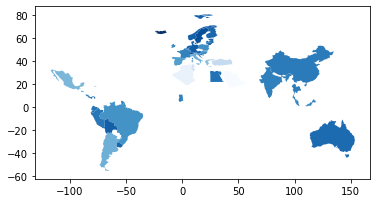

In [9]:
geospacial_df.plot(column="Female Labor Force Participation Rate",cmap="Blues")

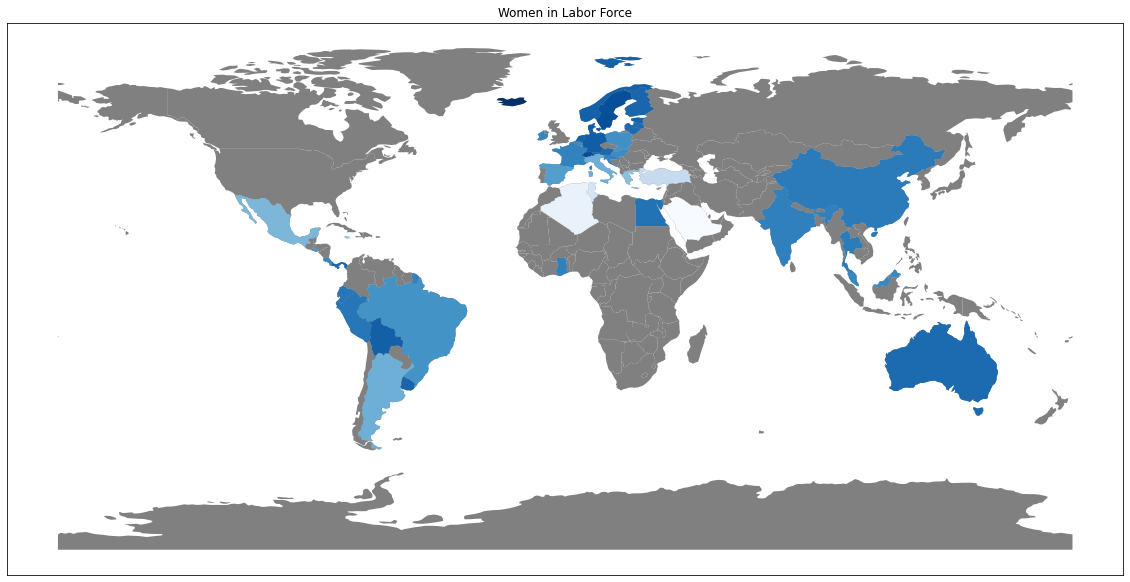

In [10]:
fig,ax = plt.subplots(figsize=(20,20))
world.plot(ax=ax, color='grey')
geospacial_df.plot(ax=ax,column="Female Labor Force Participation Rate",cmap="Blues")
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False,labelleft=False)
ax.set_title("Women in Labor Force")
plt.show()